# 06 Matrices

<center><img src="figs/06_matrix_everywhere.gif" alt="default"/></center>

#### Unit 1: Vectors, Textbook Ch. 1-5

#### Unit 2: Matrices, Textbook Ch. 6-11
- **_06 Matrices_**
- 07 Linear Equations
- 08 Linear Dynamical Systems
- 09 Matrix Multiplication
- 10 Matrix Inverse

#### Unit 3: Least Squares, Textbook Ch. 12-14

##### Outline: 06 Matrices

- **[First Definitions](#sec-matrices)**
- [Basic operations, norms and distances](#matvec)
- [Matrix-vector multiplication](#matvec)
- [Examples](#examples)

### Matrices

$\color{#EF5645}{\text{Definition}}$: A _matrix_ is a rectangular array of numbers, e.g.:
$$A =\begin{vmatrix}
0   & 1  & -2.3  \\
1.3 & 4  & -0.1 
\end{vmatrix}$$

- Its _size_ or _shape_ is: (nb of rows) x (nb of columns).
- Its elements are called: _entries, coefficients_.
- $A_{i, j}$ refers to element at ith row and jth column.
  - i is the _row index_ and j is the _column index_.

$\color{#003660}{\text{In Python}}$, we use `numpy` and `np.array` to build matrices. We compute its shape with `shape`.

In [1]:
import numpy as np

A = np.array([
    [0, 1, -2.3], 
    [1.3, 4, -0.1]
])
print(np.shape(A))
print(A.shape)

(2, 3)
(2, 3)


$\color{#003660}{\text{In Python}}$, we can access the elements of the matrix.

In [4]:
A = np.array([
    [0, 1, -2.3], 
    [1.3, 4, -0.1]
])

print(A[0, 0])
print(A[0, 2])

0.0
-2.3


### Sizes/Shapes of Matrices

$\color{#EF5645}{\text{Definitions}}$: A m x n matrix $A$ is:
- _tall_ if m > n,
- _wide_ if m < n,
- _square_ if m = n.

### Matrices, Vectors and Scalars

$\color{#EF5645}{\text{Definitions}}$:
- A 1 x 1 matrix is a number or scalar.
- A n x 1 matrix is an $n$-vector.
- A 1 x n matrix is a $n$-row-vector. 

Starting now, we will distinguish vectors and row vectors.

### Columns and rows of a matrix
$\color{#EF5645}{\text{Notations}}$: Consider the $m \times n$ matrix $A$.
- Its jth column is the $m$-vector:
$$\begin{vmatrix}
A_{1j} \\
\vdots \\
A_{mj}
\end{vmatrix}$$
- Its ith row is the $n$-row-vector: $[A_{i1}, ..., A_{in}]$.

### Slices of a matrix

$\color{#EF5645}{\text{Definition}}$ The slice of matrix $A_{p:q, r:s}$ is the matrix:
$$\begin{vmatrix}
A_{pr} & A_{p, r+1} & ... & A_{ps}  \\
... & ... & ... & ... \\
A_{qr} & A_{q, r+1} & ... & A_{qs}
\end{vmatrix}.$$

$\color{#003660}{\text{In Python}}$, we can extract rows, columns and slices:

In [7]:
A = np.array([
    [1.1, 2.2, 3.3], 
    [4.4, 5.5, 6.6], 
    [7.7, 8.8, 9.9]]); print("Matrix:"); print(A)
# print(A[0, :]); print(A[:, 1]); print(A[0, 1])
A[0:2, 1:3]

Matrix:
[[1.1 2.2 3.3]
 [4.4 5.5 6.6]
 [7.7 8.8 9.9]]


array([[2.2, 3.3],
       [5.5, 6.6]])

### Block matrices

$\color{#EF5645}{\text{Definition}}$: A matrix $A$ composed from other matrices is called a _block matrix_:
$$A = \begin{vmatrix}
B & C  \\
D & E
\end{vmatrix}$$
where $B, C, D, E$ are called _submatrices_ or _blocks_ of $A$.

### Column/row representations

$\color{#EF5645}{\text{Notations}}$: Consider the $m \times n$ matrix $A$.
- $A$ is the block matrix of its columns $a_1, ..., a_n$:
  - $A = [a_1 ... a_n]$.
- $A$ is the block matrix of its rows $b_1, ..., b_m$:
  - $A = \begin{vmatrix}
  b_1 \\
  \vdots \\
  b_m
  \end{vmatrix}.$

### Examples in ECE and beyond

- Images: $A_{ij}$ is intensity value at $i, j$.

$\color{#003660}{\text{In Python}}$, we use `imshow` to plot an image.

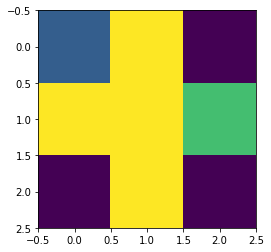

In [14]:
A = np.array([[0.3, 1, 0],[1, 1, 0.7],[0, 1, 0]]); A
import matplotlib.pyplot as plt
plt.imshow(A, cmap="viridis");

### Examples in ECE and beyond


- Weather: $A_{ij}$ is rainfall data at location $i$ on day $j$.
- Finances: $A_{ij}$ is the return of asset $i$ in period $j$.

$\color{#047C91}{\text{Exercise}}$: In each of these, what do the rows and columns mean?

### Special Matrices

$\color{#EF5645}{\text{Definition}}$: The $m \times n$ _zero matrix_ (resp. _ones-matrix_) is the matrix with all entries equal to $0$ (resp. to $1$).

$\color{#EF5645}{\text{Definition}}$: The _identity matrix_ $I$ is the square matrix with $I_{ii} = 1$ and $I_{ij} = 0$ if $i\neq j$, for example:
$$\begin{vmatrix}
1 & 0 \\
0 & 1 
\end{vmatrix}.$$

$\color{#003660}{\text{In Python}}$:

In [17]:
zero_mat = np.zeros((2, 3)); print(zero_mat) # 2 x 3
ones_mat = np.ones((2, 4)); print(ones_mat) #2 x 4
identity_mat = np.identity(4); identity_mat

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Diagonal Matrices

$\color{#EF5645}{\text{Definition}}$: A _diagonal matrix_ $A$ is a square matrix with $A_{ij} = 0$ for $i \neq j$.
- diag$(a_1, ..., a_n)$ denotes the diagonal matrix with $A_{ii} = a_i$:
$$\text{diag}(0.2, -3, 1.2) = \begin{vmatrix}
0.2 & 0 & 0 \\
0 & -3 & 0 \\
0 & 0 & 1.2
\end{vmatrix}$$

$\color{#003660}{\text{In Python}}$, we use `np.diag` to create a diagonal matrix from a vector $a$.

In [19]:
np.diag(np.array([2.2, 3.3, 4.4]))

array([[2.2, 0. , 0. ],
       [0. , 3.3, 0. ],
       [0. , 0. , 4.4]])

### Triangular Matrices

$\color{#EF5645}{\text{Definition}}$: 
- A _lower triangular matrix_ $A$ is a matrix such that $A_{ij} = 0$ for $i < j$. 
- An _upper triangular matrix_ $A$ is a matrix such that $A_{ij} = 0$ for $i > j$.

$\color{#047C91}{\text{Example}}$:
$\begin{vmatrix}0.2 & 1.2 & 10 \\0 & -3 & 0 \\0 & 0 & 1.2\end{vmatrix}$ (upper-triangular).

##### Outline: 06 Matrices

- [First Definitions](#sec-matrices)
- **[Basic operations, norms and distances](#matvec)**
- [Matrix-vector multiplication](#matvec)
- [Examples](#examples)

### Transpose

$\color{#EF5645}{\text{Definition}}$: The _transpose of an $m \times n$ matrix_ $A$ is a $n \times m$ matrix, written $A^T$, and is defined by:
$$ (A^T)_{ij} = A_{ji}, \quad i = 1,..., n \quad j=1,...,m$$

$\color{#047C91}{\text{Example}}$: $\begin{vmatrix}
0.2 & 1.2 & 10 \\
0 & -3 & 0
\end{vmatrix}^T = \begin{vmatrix}
0.2 & 0 \\
1.2 & -3 \\
10 & 0
\end{vmatrix}$

$\color{#003660}{\text{In Python}}$:

[[0.3 1.  0. ]
 [1.  1.  0.7]
 [0.  1.  0. ]]
[[0.3 1.  0. ]
 [1.  1.  1. ]
 [0.  0.7 0. ]]


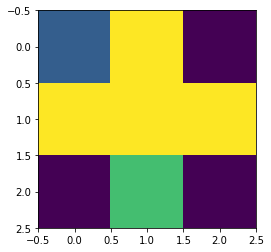

In [23]:
print(A); print(A.T); plt.imshow(A.T);

$\color{#6D7D33}{\text{Property}}$: The transpose verifies:
- $(A^T)^T = A$
- $(A + B)^T = A^T + B^T$

### Basic Operations

Just like vectors:
- we can add or subtract matrices of the same size,
- we can multiply a matrix by a scalar.

In [25]:
print(A); print(2 * A)

[[0.3 1.  0. ]
 [1.  1.  0.7]
 [0.  1.  0. ]]
[[0.6 2.  0. ]
 [2.  2.  1.4]
 [0.  2.  0. ]]


### Matrix Norm

$\color{#EF5645}{\text{Definition}}$: For a $m \times n$ matrix $A$, we define the _matrix norm_ as:

<center>
$||A|| = \sqrt{\sum_{i=1}^m \sum_{j=1}^n A_{ij}^2}.$</center>

$\color{#EF5645}{\text{Remark}}$: This definition agrees with the definition of norm of vectors when $n=1$ or $m=1$.

$\color{#047C91}{\text{Exercise}}$: Compute the matrix norm of $A = \begin{vmatrix}
1 & 0 & -1\\
0 & 1 & 1 \end{vmatrix}.$

$\color{#003660}{\text{In Python}}$, we use `np.linalg.norm`.

In [27]:
import numpy as np

A = np.array([
    [1, 0, -1],
    [0, 1, 1]
])
print(np.linalg.norm(A))

2.0


### Distance between two matrices

$\color{#EF5645}{\text{Definition}}$: The _distance_ between two matrices $A$ and $B$ is defined as:
$$dist(A, B) = ||A - B||.$$

$\color{#EF5645}{\text{Remark}}$: This means that the clustering algorithm, which only needs a notion of "distance", works on the matrices.

##### Outline: 06 Matrices

- [First Definitions](#sec-matrices)
- [Basic operations, norms and distances](#matvec)
- **[Matrix-vector multiplication](#matvec)**
- [Examples](#examples)

### Matrix-vector multiplication

$\color{#EF5645}{\text{Definition}}$: The _matrix-vector multiplication_ $y$ of $m\times n$ matrix $A$ and $n$-vector $x$ is denoted $y = Ax$ and is defined as:
$$y_i = A_{i1}x_1 + ... + A_{in}x_{n}, \quad i=1,...,m$$

$\color{#047C91}{\text{Exercise}}$: Let $I$ be the $n \times n$ identity matrix and $x$ an $n$-vector. Compute $Ix$.

$\color{#047C91}{\text{Exercise}}$: Let $0_n$ be the $n \times n$ zeroes matrix and $x$ an $n$-vector. Compute $0_nx$.

$\color{#047C91}{\text{Exercise}}$: Compute the matrix-vector multiplication of:
$$A = \begin{vmatrix}
0 & 2 & -1 \\
-2 & 1 & 1 \end{vmatrix}; \quad v = \begin{vmatrix}
    2 \\
    1 \\
    -1
    \end{vmatrix}$$

$\color{#003660}{\text{In Python}}$, we use `np.matmul` or the symbol `@`.

In [28]:
print(A)
x = np.array([1, 2, 3]); print(x)

print(np.matmul(A, x))
print(A @ x)

[[ 1  0 -1]
 [ 0  1  1]]
[1 2 3]
[-2  5]
[-2  5]


$\color{#047C91}{\text{Exercise}}$: Take $m\times n$ matrix $A$, and one-hot vector $e_i$ for some $i$ in $1,..., m$. Compute $Ae_i$.

$\color{#047C91}{\text{Exercise}}$: Take $m\times n$ matrix $A$, and ones vector $1_n$. Compute $A1_n$.

##### Outline: 06 Matrices

- [First Definitions](#sec-matrices)
- [Basic operations, norms and distances](#matvec)
- [Matrix-vector multiplication](#matvec)
- **[Examples](#examples)**

### Math operations as matrices
$\color{#047C91}{\text{Example}}$: The $(n-1) \times n$ difference matrix:
$$D = \begin{vmatrix}
-1 & 1  & 0 & ... & 0 & 0 \\
0  & -1 & 1 & ... & 0 & 0 \\
   &    &   &     &   &   \\
0  & 0  & 0 & ... & -1 & 1
\end{vmatrix}$$
gives the $(n-1)$ vector of differences:
$Dx = \begin{vmatrix}
x_2 - x_1 \\
x_3 - x_2 \\
\vdots \\
x_n - x_{n-1}
\end{vmatrix}
$

$\color{#003660}{\text{In Python}}$, let be given a vector listing the days at which earthquakes have happened in California. Compute the vector giving the number of days in-between earthquakes.

In [30]:
earthquake_days = np.array([12, 44, 78])
D = np.array([
    [-1, 1, 0],
    [0, -1, 1]
])

print(D @ earthquake_days)
print(45 - 12)
print(78 - 45)

[32 34]
33
33


### Geometric transformations as matrices

Geometric transformations can be represented as matrices. They transform vectors $x$ through: $y = Ax$.

$\color{#047C91}{\text{Example}}$: Rotation by $\theta$:
$$R_\theta = \begin{vmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)\end{vmatrix}, \quad y = R_\theta x$$


<center><img src="figs/06_rotmat.png" alt="default"/></center>

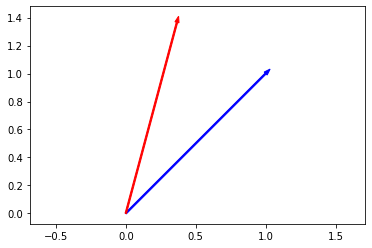

In [39]:
import matplotlib.pyplot as plt
x = np.array([1, 1])
plt.arrow(0, 0, x[0], x[1], width=0.01, color="blue")
theta = np.pi / 6
R = np.array([
    [np.cos(theta), - np.sin(theta)], 
    [np.sin(theta), np.cos(theta)]])
y = R @ x; 
plt.arrow(0, 0, y[0], y[1], width=0.01, color="red"); 
plt.axis("equal");

### (Social) graphs as matrices

Any (social network) graph with $n$ nodes can be represented by $n \times n$ matrix $A$, called adjacency matrix and defined as

$A_{ij} = \begin{vmatrix}
    1 \quad \text{if $i$ goes to $j$}\\
    0 \quad \text{otherwise}
\end{vmatrix}.$

<center><img src="figs/06_graph.png" alt="default" width=350px /></center>

$\color{#047C91}{\text{Exercise}}$: Compute the adjacency matrix associated to this graph.

### Deep Learning

<center><img src="figs/01_nn.png" alt="default"/></center>

By writing $a^{(1)}$ the vector of the first layer, and $a^{(2)}$ the vector of the second layer, we see that:
$$a^{(2)} = Wa^{(1)},$$
where $W_{ij}$ is the weight on the edge going from the $j$th element of the first layer $a^{(1)}_j$ to the $i$th element of the second layer $a^{(2)}_i$.

$\color{#003660}{\text{In Python}}$, we can implement the layer of a neural network.

In [40]:
def simple_nn(input_x, weights):
    return weights @ input_x

##### Outline: 06 Matrices

- [First Definitions](#sec-matrices)
- [Basic operations, norms and distances](#matvec)
- [Matrix-vector multiplication](#matvec)
- [Examples](#examples)

Resources: Textbook Ch. 6, 7.